In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from scipy.spatial import Voronoi, voronoi_plot_2d
import highlight_text

In [2]:
barca_x=[93,96,99,102,104,95,86,79,89]
barca_y=[9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((9,),dtype=int))

opp_x=[99,100,102,104,104,102,97,98,94,77]
opp_y=[14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((10,),dtype=int))

df = pd.DataFrame({
    'x':barca_x+opp_x,
    'y':barca_y+opp_y,
    'team':barca+opp
})

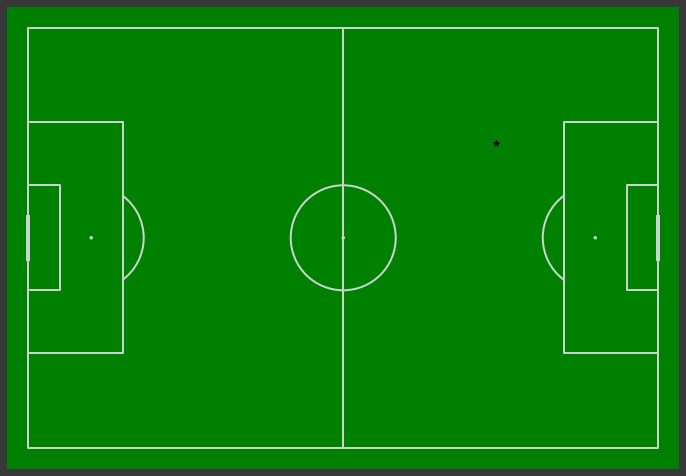

In [3]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb',pitch_color='green', line_color='#c7d5cc')

pitch.draw(ax=ax)

pitch.scatter(89,22,ax=ax,marker='*',color='black')

In [4]:
df

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


In [5]:
points=np.column_stack((df.x,df.y)) #puts them in an array to pass on for voronoi diagram

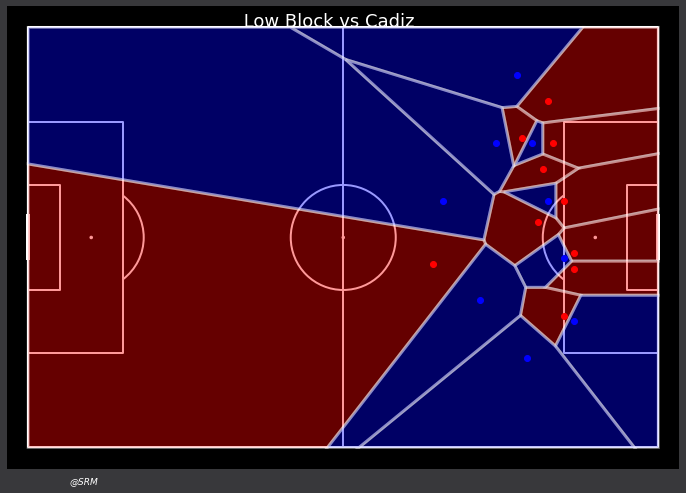

In [6]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', pitch_color='black', line_color='white')

pitch.draw(ax=ax)

x=df.x
y=df.y
team1,team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1, ax=ax, fc='red', ec='white', lw=3, alpha=0.4)
t2 = pitch.polygon(team2, ax=ax, fc='blue', ec='white', lw=3, alpha=0.4)

# Plot players
for i in range(len(df['x'])):
    if df['team'][i]==0:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='blue')
    if df['team'][i]==1:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='red')
        

fig.text(x=.22,y=.1,s='@SRM',fontstyle='italic',fontsize=9,fontfamily='DejaVu Sans',color='white')

s=' Low Block vs Cadiz'
highlight_text.fig_text(s=s,x=.40, y=.87, 
                        fontfamily='DejaVu Sans', fontsize=18, color='white')

